In [1]:
import sys
sys.path.append('/public/src')
from factor_evaluation_server import FactorEvaluation,DataService # type: ignore
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import pandas_ta as ta

In [2]:
ds=DataService()
df=ds['ETHUSDT_15m_2020_2025']['2021-10-01':]

In [3]:
evaluator=FactorEvaluation(df=df,future_return_periods=10)

# 定义因子！

In [44]:
def SUMP_factor(df, n=60):
    """
    计算SUMP因子：滚动窗口内上涨幅度之和与绝对变化之和的比率
    类似于RSI指标，但使用不同的计算方法
    
    参数:
    df: 包含OHLCV数据的DataFrame
    n: 滚动窗口大小 (默认20)
    """
    # 计算价格变化
    delta = df['close'].diff(1)
    
    # 计算上涨幅度（价格上升的部分）
    gain = delta.where(delta > 0, 0)
    
    # 计算绝对价格变化
    abs_delta = np.abs(delta)
    
    # 计算滚动窗口内的上涨幅度和
    sum_gain = gain.rolling(window=n).sum()
    
    # 计算滚动窗口内的绝对变化和
    sum_abs = abs_delta.rolling(window=n).sum()
    
    # 计算SUMP因子：上涨幅度和 / (绝对变化和 + 小常数)
    factor = sum_gain / (sum_abs + 1e-12)
    
    return factor

# 测试因子表现


📊 单币种 (single) 详细评估结果:
--------------------------------------------------
🔗 相关性分析:
   IC (Pearson): 0.019755
   Rank_IC (Spearman): -0.023842
📊 信息比率:
   IR: 0.303755
   有效分组数: 10
📊 因子分布:
📋 数据概况:
   数据长度: 130590
   因子列: SUMP_factor
   收益率列: future_return
   未来收益周期: 10
--------------------------------------------------

🖼️  单币种 (single) 图片展示:
----------------------------------------
📊 显示分组分析图...


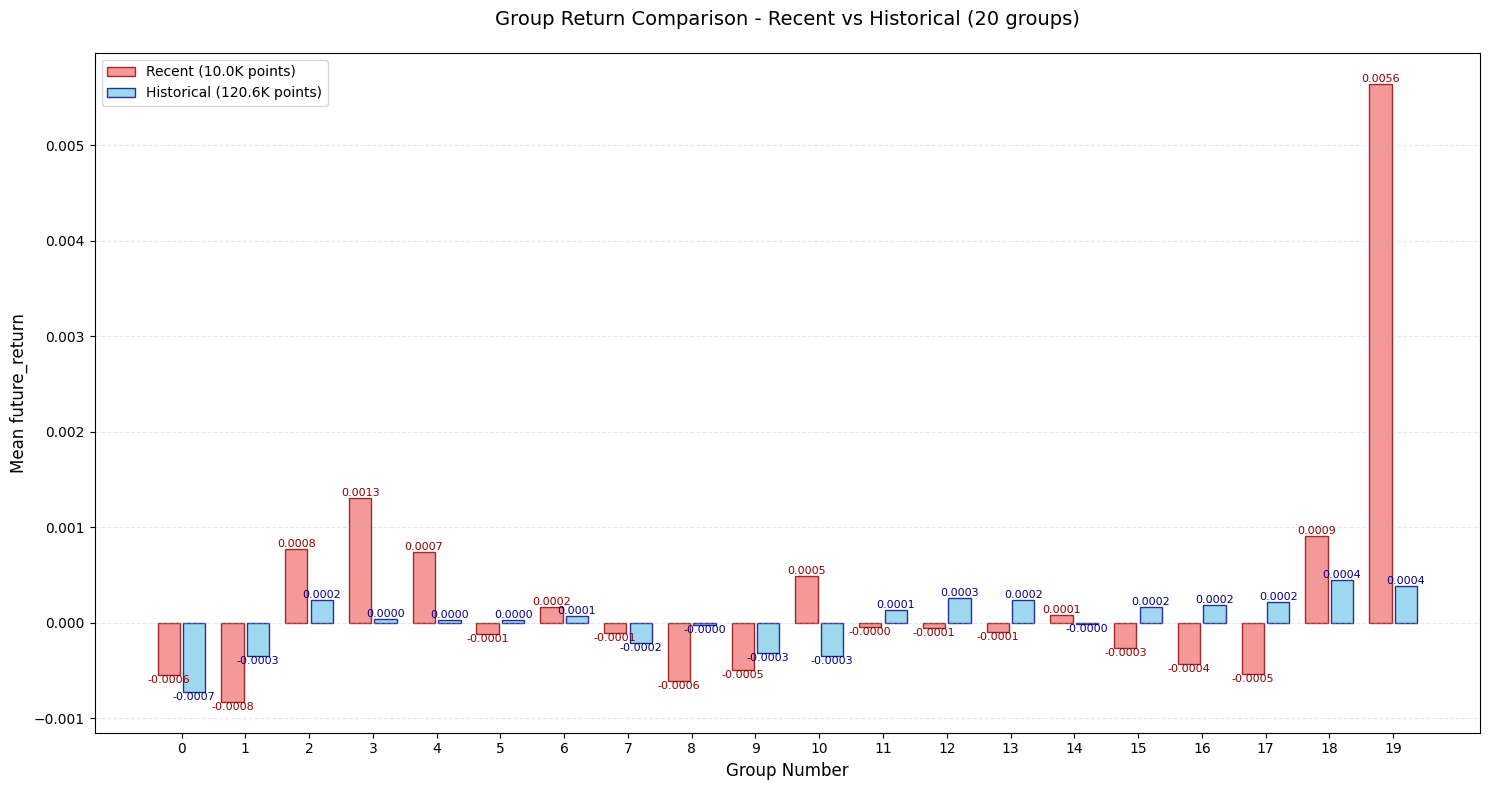

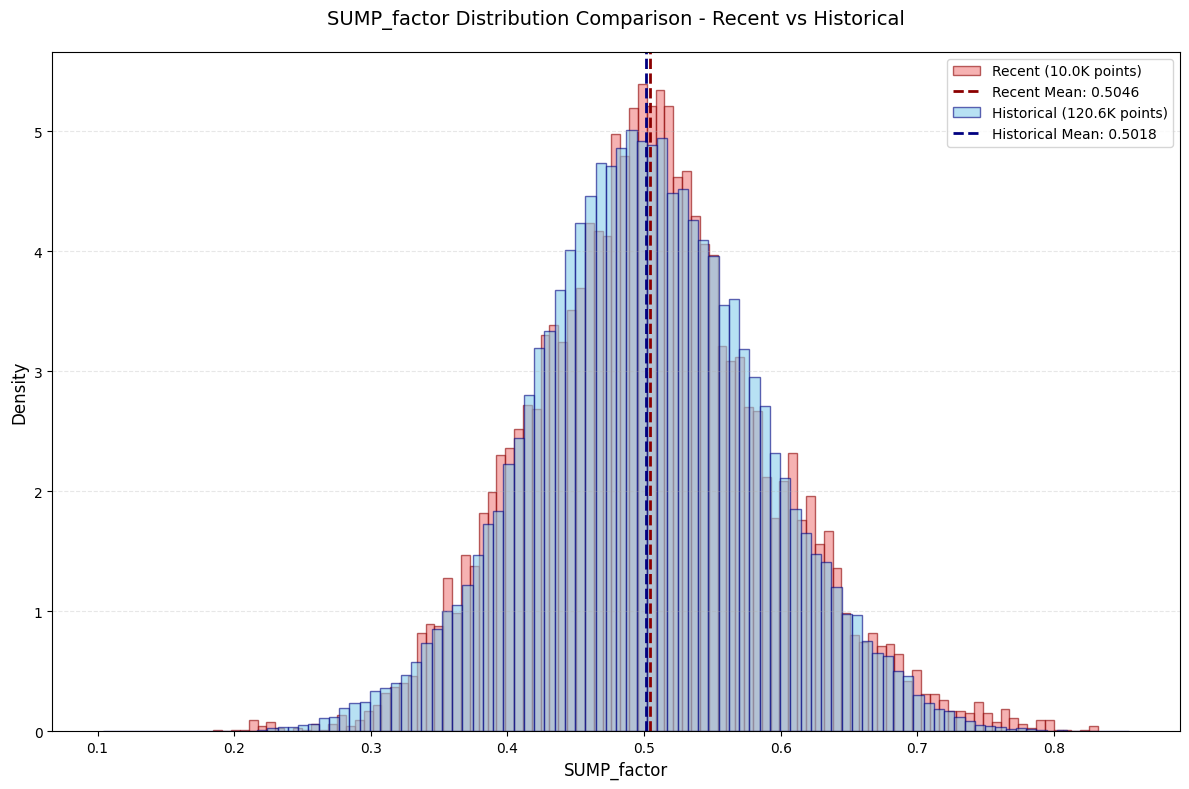

📈 显示因子分布图...
✅ 已显示 2 个图片
----------------------------------------


In [45]:
evaluator.set_factor(
    factor_func=SUMP_factor,
    factor_name='SUMP_factor'
)

result=evaluator.run_full_evaluation(run_stationarity_test=False)

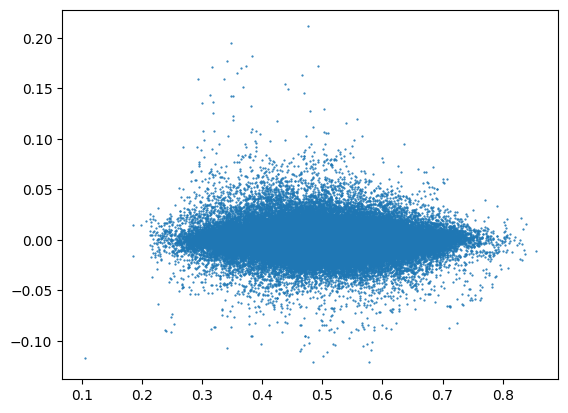

In [46]:
import matplotlib.pyplot as plt
plt.scatter(SUMP_factor(df),df['close'].pct_change(-10), s=0.3)

In [47]:
result['information_ratio']['group_correlations']
# 这表示不同分组之间的相关性，通常用于评估因子在不同市场状态下的表现一致性。
# 如果相关性较高，说明因子在不同市场状态下表现一致；如果相关性较低，说明因子在不同市场状态下表现差异较大。

[0.004759397074030684,
 -0.009374541380868035,
 -0.0014490571746878216,
 -0.01000971235214222,
 -0.0005230810517273966,
 0.027237865788181707,
 -0.001509534947756893,
 0.009809386975746402,
 -0.00486594941415581,
 0.0224959200004845]

In [48]:
print(result)

{'correlation_analysis': {'IC': 0.019755438642955828, 'Rank_IC': -0.02384198422279237}, 'information_ratio': {'IR': 0.30375461418347566, 'group_correlations': [0.004759397074030684, -0.009374541380868035, -0.0014490571746878216, -0.01000971235214222, -0.0005230810517273966, 0.027237865788181707, -0.001509534947756893, 0.009809386975746402, -0.00486594941415581, 0.0224959200004845], 'n_groups': 10}, 'group_analysis': {'group_stats':        val_min  val_max  val_mean  return_mean  return_std  count
group                                                            
0       0.1043   0.3651    0.3292      -0.0007      0.0166   6530
1       0.3651   0.3973    0.3829      -0.0004      0.0139   6529
2       0.3973   0.4175    0.4080       0.0003      0.0126   6530
3       0.4175   0.4333    0.4257       0.0001      0.0120   6529
4       0.4333   0.4468    0.4402       0.0001      0.0115   6530
5       0.4468   0.4587    0.4528       0.0000      0.0109   6529
6       0.4587   0.4697    0.4643   